**© 2022 Scott A. Bruce. Do not distribute.**

# 1. SQL Alchemy to load data into Python

In [2]:
from sqlalchemy import create_engine
import pandas as pd # if you see pd, that means it's a function or object coming from pandas packages. 
from IPython.core.interactiveshell import InteractiveShell # the below two lines allow us to see things interactively. 
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
%matplotlib inline # everytime we plot sth. with matplotlib we want to see it inline with the code. 

In [12]:
# psycopg2 is the underline function that actually runs in your database. 
cnxn_string = ("postgresql+psycopg2://{username}:{pswd}"  # we need to define things in the curly brackets
              "@{host}:{port}/{database}")
print(cnxn_string)

postgresql+psycopg2://{username}:{pswd}@{host}:{port}/{database}


In [13]:
# creates an object engine by calling create_engine function.
# the first input to the function is cnxn_string, you specified previously. However, we need to format it by adding in the 
# specific part of the strings corresponding to our username, pswd, ..., database. 
# .format() allows us to specify the function. 
engine = create_engine(cnxn_string.format(
    username="postgres",
    pswd="behappy",
    host="postgres",
    port=5432,
    database="sqlda"))

# just to verify it works, once engine is created, we execute a simple query "select..." to show it works. 
engine.execute("SELECT * FROM customers LIMIT 2;").fetchall()  # fetch all -> excute it 

[(1, None, 'Arlena', 'Riveles', None, 'ariveles0@stumbleupon.com', 'F', '98.36.172.246', None, None, None, None, None, None, None, datetime.datetime(2017, 4, 23, 0, 0)),
 (2, 'Dr', 'Ode', 'Stovin', None, 'ostovin1@npr.org', 'M', '16.97.59.186', '314-534-4361', '2573 Fordem Parkway', 'Saint Louis', 'MO', '63116', 38.5814, -90.2625, datetime.datetime(2014, 10, 2, 0, 0))]

In [14]:
customers_data = pd.read_sql_table('customers',engine) # function, read_sql_table, takes 2 inputs: the name of the table 
# you want to read ('customer') and engine which allows us to connect to database. 

In [15]:
query = """select city, count(*) as number_of_customers,
           count(nullif(gender,'M')) as female,
           count(nullif(gender,'F')) as male
           from customers
           where city is not null
           group by city
           order by number_of_customers desc
           limit 10"""        # three double quotes are a way to specify the query. 

In [16]:
top_cities_data = pd.read_sql_query(query,engine) # use another funcion within pd and pass query to it instead of passing name
# of the table. It connects to the DB using the connection you provided, run the query and brings all results into a pandas DF 
# calling top_cities_data. 

In [17]:
top_cities_data

,city,number_of_customers,female,male
0,Washington,1447,734,713
1,Houston,904,446,458
2,New York City,731,369,362
3,El Paso,713,369,344
4,Dallas,607,309,298
5,Atlanta,571,292,279
6,Sacramento,506,244,262
7,Los Angeles,466,241,225
8,San Antonio,426,207,219
9,Miami,426,195,231


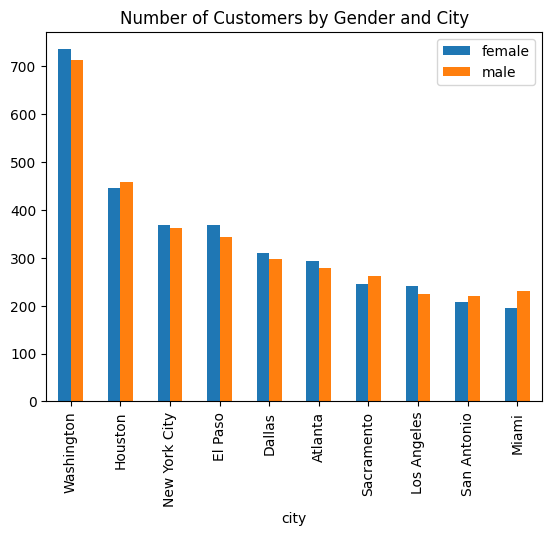

In [18]:
# After set into pandas DF, we can do all the typical stuff: visualization, manipulation, produce models etc. 
ax = top_cities_data.plot.bar('city',y=['female','male'],
                              title='Number of Customers by Gender and City')

# 2. Writing data to database using Python

In [19]:
# pass DF back to DB using engine bridge. 
top_cities_data.to_sql('top_cities_data',engine,
                       index=False,if_exists='replace') # additional inputs you want to specify. 

In [20]:
#get help using the help function
help('pandas.DataFrame.to_sql')

Help on function to_sql in pandas.DataFrame:

pandas.DataFrame.to_sql = to_sql(self, name: 'str', con, schema=None, if_exists: 'str' = 'fail', index: 'bool_t' = True, index_label=None, chunksize=None, dtype: 'DtypeArg | None' = None, method=None) -> 'None'
    Write records stored in a DataFrame to a SQL database.
    
    Databases supported by SQLAlchemy [1]_ are supported. Tables can be
    newly created, appended to, or overwritten.
    
    Parameters
    ----------
    name : str
        Name of SQL table.
    con : sqlalchemy.engine.(Engine or Connection) or sqlite3.Connection
        Using SQLAlchemy makes it possible to use any DB supported by that
        library. Legacy support is provided for sqlite3.Connection objects. The user
        is responsible for engine disposal and connection closure for the SQLAlchemy
        connectable See `here                 <https://docs.sqlalchemy.org/en/13/core/connections.html>`_.
    
    schema : str, optional
        Specify the schem

In [21]:
#but what if you can't remember the name of the function?

#using tab and shift+tab for help in Jupyter notebooks
pd.pandas.DataFrame
#now press tab, which will bring up all possible functions, so you can find the one you are looking for
pd.pandas.DataFrame.to_sql
#now press shift+tab, which will bring up the help file and input arguments (in case you forget them)

pandas.core.frame.DataFrame

<function pandas.core.generic.NDFrame.to_sql(self, name: 'str', con, schema=None, if_exists: 'str' = 'fail', index: 'bool_t' = True, index_label=None, chunksize=None, dtype: 'DtypeArg | None' = None, method=None) -> 'None'>

# 3. Reading and writing CSV files with Python

In [22]:
# index is like a row index ex. 0,1,2..., if index=True, it will create a seperate column at the beginning. 
top_cities_data.to_csv('top_cities_analysis.csv',index=False) 
my_data=pd.read_csv('top_cities_analysis.csv')
my_data

,city,number_of_customers,female,male
0,Washington,1447,734,713
1,Houston,904,446,458
2,New York City,731,369,362
3,El Paso,713,369,344
4,Dallas,607,309,298
5,Atlanta,571,292,279
6,Sacramento,506,244,262
7,Los Angeles,466,241,225
8,San Antonio,426,207,219
9,Miami,426,195,231


In [23]:
help('pandas.read_csv')

Help on function read_csv in pandas:

pandas.read_csv = read_csv(filepath_or_buffer: 'FilePathOrBuffer', sep=<no_default>, delimiter=None, header='infer', names=<no_default>, index_col=None, usecols=None, squeeze=False, prefix=<no_default>, mangle_dupe_cols=True, dtype: 'DtypeArg | None' = None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, cache_dates=True, iterator=False, chunksize=None, compression='infer', thousands=None, decimal: 'str' = '.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, encoding_errors: 'str | None' = 'strict', dialect=None, error_bad_lines=None, warn_bad_lines=None, on_bad_lines=None, delim_whitespace=False, low_memory=Tru

# 4. Python basics (following Ch 1 of Python Workshop textbook)

## 4.1 Basic math operations

In [24]:
#run these basic examples on your machine
5+2
5-2
5*2
5/2
5//2 #integer division, get rids of the remains 
5**2 #5 squared
5%2 #modulus

7

3

10

2.5

2

25

1

In [17]:
#remember your order of operations (when in doubt, use parentheses)
(100 - 5 ** 3) / 5
6 + 15 % 4 
2 ** 2 + 24 // 4

-5.0

9

10

In [18]:
#spacing can improve readability (but doesn't change the meaning)
6+5
6 + 5

11

11

## 4.2 Integer vs. float

In [19]:
type(6)
type(6.0)

int

float

In [20]:
#what happens when you add an int and float?
5 + 3.14
type(5 + 3.14) # convert to a more general form. 

8.14

float

In [21]:
#convert to different types
int(7.99999999)
float(6)

7

6.0

## 4.3 Complex numbers

In [22]:
#Python uses j instead of i to represent sqrt(-1) (imaginery number)
(2 + 3j)/(1 - 5j)

(-0.5+0.5j)

## 4.4 Variables

In [23]:
x = 2
x + 1

3

In [24]:
x = 3.0
x + 1    # c++ won't let you do it since a wrong match.  

4.0

In [25]:
#python is dynamically typed (vs. unchanging types)
y = 10
type(y)
y = y - 10.0
type(y)

int

float

### 4.4.1 Reassigning variables in terms of themselves

In [26]:
x = 3
x = x + 1
x

x = 3
x += 1   # use shorthand 
x

x = 3
x -= 1
x

x = 3
x *= 5
x

4

4

2

15

In [ ]:
# variables can not start with numbers, special characters, keywords, nor built-in types
$&^city = 5

In [ ]:
# variables cannot contain spaces between characters
best city = 'College Station'

In [29]:
# keywords to avoid when naming variables (Python will throw an error)
import keyword
print(keyword.kwlist)

['False', 'None', 'True', 'and', 'as', 'assert', 'async', 'await', 'break', 'class', 'continue', 'def', 'del', 'elif', 'else', 'except', 'finally', 'for', 'from', 'global', 'if', 'import', 'in', 'is', 'lambda', 'nonlocal', 'not', 'or', 'pass', 'raise', 'return', 'try', 'while', 'with', 'yield']


In [30]:
# underscores are helpful
best_city = 'College Station'
best_city

'College Station'

### 4.4.2 Declaring multiple variables (the Pythonic way)

In [31]:
x, y, z = 8, 5, 'cat'
x
y
z

8

5

'cat'

## 4.5 Docstrings vs. comments

In [32]:
# this is a comment
"""
Docstrings are like comments in that nothing happens when
you execute this cell.  However, they are typically used 
when developers want to provide a description on what
a particular 'document' (e.g. program, function, class, etc.)
actually does.  These descriptions typically span
multiple lines vs. comments which typically span one line.
"""

"\nDocstrings are like comments in that nothing happens when\nyou execute this cell.  However, they are typically used \nwhen developers want to provide a description on what\na particular 'document' (e.g. program, function, class, etc.)\nactually does.  These descriptions typically span\nmultiple lines vs. comments which typically span one line.\n"

## 4.6 Strings

In [33]:
bookstore = 'City Lights'
bookstore
bookstore = "City Lights"
bookstore

'City Lights'

'City Lights'

In [ ]:
#be consistent!
bookstore = 'City Lights"

In [ ]:
#strings with apostrophes
bookstore = 'Moe's'

In [36]:
bookstore = "Moe's"
bookstore

"Moe's"

In [37]:
bookstore = 'Moe\'s'
bookstore

"Moe's"

### 4.6.1 Multi line strings

In [38]:
vacation_note = """
During our vacation to San Francisco, we
waiting in a long line by Powell St. Station
to take the cable car.

Tap dancers performed on wooden boards.

We started to look for a good place to eat
when the cable car arrived.
"""
vacation_note
#notice the escape sequences denoting the line breaks (\n)

print(vacation_note)  # print out in a nice way. 

'\nDuring our vacation to San Francisco, we\nwaiting in a long line by Powell St. Station\nto take the cable car.\n\nTap dancers performed on wooden boards.\n\nWe started to look for a good place to eat\nwhen the cable car arrived.\n'


During our vacation to San Francisco, we
waiting in a long line by Powell St. Station
to take the cable car.

Tap dancers performed on wooden boards.

We started to look for a good place to eat
when the cable car arrived.



### 4.6.2 String concatenation

In [27]:
greeting = 'Howdy'
print(greeting + 'Sir.')
greeting = 'Howdy '
print(greeting + 'Sir.')
print(greeting * 5)


HowdySir.
Howdy Sir.
Howdy Howdy Howdy Howdy Howdy 


### 4.6.3 String interpolation

In [28]:
greeting = 'Howdy'
print('Should we greet people with', greeting, 'in College Station?')

Should we greet people with Howdy in College Station?


In [29]:
owner = 'Lawrence Ferlinghetti'
age = 100
print('The founder of City Lights Bookstore, {}, is now {} years old.'.format(owner,age))

The founder of City Lights Bookstore, Lawrence Ferlinghetti, is now 100 years old.


### 4.6.4 Built-in string functions

In [30]:
len(greeting)

5

In [43]:
len(g) # click tab and the available variables will pop up. it's useful when you forget variable name
#use tab completion to find variables
#type len(g then hit the tab button
#type greeting. then hit the tab button
greeting.  # you will see all the available functions for working with the string. this can give you everyting function you 
# can do with the object. 

In [31]:
greeting.lower()
greeting.upper()
greeting.endswith('y')
greeting.count('w')

'howdy'

'HOWDY'

True

1

### 4.6.5 Casting

In [45]:
type('5')
'5' + '7'
int('5') + int('7')

str

'57'

12

### 4.6.6 Inputs from user

In [32]:
print('What is your name?')
name = input()
print('Hello, ' + name + '.')
#If an error arises, restart the kernel

What is your name?
rose
Hello, rose.


### 4.6.7 String slicing and indexing

In [47]:
#Python starts at 0 when indexing
destination = 'College Station'
destination[0]
destination[1]
destination[-1]
destination[7]

'C'

'o'

'n'

' '

In [48]:
#Slicing
destination[0:7]
#Caution: lower bound of slice is always included, but upper bound is not!

'College'

In [49]:
#shortcut: omit the first numerical character to start at the beginning
destination[:10]
#shortcut: omit the last numerical character to go to the end and use a negative to specify how many before
destination[-3:]

'College St'

'ion'

## 4.7 Booleans and conditionals

In [50]:
over_18 = True
type(over_18)

bool

In [51]:
over_21 = False
over_21

False

### 4.7.1 Logical operators

In [52]:
over_18 and over_21
over_18 or over_21
not over_18
not over_21 or (over_21 or over_18) #combine logical operators
not (over_21 or (over_21 or over_18)) #parentheses matter

False

True

False

True

False

### 4.7.2 Comparison Operators

In [53]:
age = 20
age < 13
age >= 4
age == 20
age != 20
age >= 20 and age <= 21 #combine with logical operators

False

True

True

False

True

In [54]:
#equivalence can take place across different data types
6 == 6.0 

#but not always
6 == '6'

#pro tip: cast objects to be the same type before checking equivalence

True

False

In [55]:
age=20

#use parentheses for clarity
(20 <= age < 30) or (30 <= age < 40)

True

### 4.7.3 Comparing strings

In [56]:
#alphabetical order is used to compare strings
'a' < 'c'
'Austin' > 'College Station'

True

False

### 4.7.4 Conditionals (if)

In [57]:
age=20
if age < 18:
    print('You aren\'t old enough to vote.')

"""
important features of the if statement:
1) if keyword (start here)
2) everything between the if keyword and the colon (:) is the condition to be checked
3) colon(:) indicates the completion of the condition (compiler 
   then looks back to see if condition is true or false)
4) everything that follows the colon MUST be indented
"""

'\nimportant features of the if statement:\n1) if keyword (start here)\n2) everything between the if keyword and the colon (:) is the condition to be checked\n3) colon(:) indicates the completion of the condition (compiler \n   then looks back to see if condition is true or false)\n4) everything that follows the colon MUST be indented\n'

In [ ]:
#indentation matters (generally can be accomplished with 4 spaces or the tab key)
age=20
if age < 18:
print('You aren\'t old enough to vote.')

In [35]:
#indentation matters (generally can be accomplished with 4 spaces or the tab key)
age=20
if age < 18:
    print('You aren\'t old enough to vote.')

In [34]:
#Nested conditionals with more indentation
age=20
if age >=18:
    print('You can vote.')
    if age >= 21:
        print('You can play poker.')

You can vote.


### 4.7.5 Conditionals (if-else)

In [61]:
age=20
if age >= 18:
    print('Welcome to our voting program.')
else:
    print('You aren\'t old enough to vote.')
        

Welcome to our voting program.


### 4.7.6 Conditionals (elif)

In [62]:
#sort for else if
age=20
if age <= 10:
    print('Listen, learn, and have fun.')
elif age <= 19:
    print('Go fearlessly forward.')
else:
    print('Each day is magical.')

Each day is magical.


## 4.8 Loops

### 4.8.1 While loops

In [63]:
# while loop example
i = 1 # initialize the variable
while i <= 10: #set up the condition that must be met for the loop to run
    print(i) #specify what should be done if the condition is met
    i += 1 #increment the variable
    
# Note: you will get stuck in infinite loops.  It happens to everyone.  When this happens,
# just restart the kernel.

1
2
3
4
5
6
7
8
9
10


### 4.8.2 Breaks

In [64]:
x=100
while x <= 1000:
    x += 1
    if x % 17 == 0:
        print('', x, 'is the first number greater than 100 that is divisible by 17.')
        break

 102 is the first number greater than 100 that is divisible by 17.


### 4.8.3 Exercise 19: The Real Estate Offer

In [42]:
print('A one bedroom in the Bay Area is listed at $599,000.')
print('Enter your first offer on the house.')
offer = abs(int(input()))
print('Enter your best offer on the house.')
best = abs(int(input()))
print('How much more do you want to offer each time?')
increment = abs(int(input()))

offer_accepted = False
while offer <= best:
    if offer >= 650000:
        offer_accepted = True
        print('Your offer of', offer, 'has been accepted!')
        break
    else:
        print('We\'re sorry, you\'re offer of',offer,'has not been accepted.')
        offer += increment


A one bedroom in the Bay Area is listed at $599,000.
Enter your first offer on the house.
400000
Enter your best offer on the house.
700000
How much more do you want to offer each time?
100000
We're sorry, you're offer of 400000 has not been accepted.
We're sorry, you're offer of 500000 has not been accepted.
We're sorry, you're offer of 600000 has not been accepted.
Your offer of 700000 has been accepted!


### 4.8.4 For loops

In [43]:
for i in 'Bryan':
    print(i)

B
r
y
a
n


In [67]:
for i in range(1,10):
    print(i)
#notice the range doesn't include 10

1
2
3
4
5
6
7
8
9


In [68]:
for i in range(10):
    print(i)
#providing only 1 argument to range uses 0 to start and gives the first 10 numbers

0
1
2
3
4
5
6
7
8
9


In [69]:
for i in range(1,11,2):
    print(i)
#the third argument is the increment

1
3
5
7
9


In [70]:
for i in range(3,0,-1):
    print(i)
#increments can be negative

3
2
1


### The continue keyword

In [71]:
#used to interrupt the instructions provided in the loop and return to the beginning of the loop
for num in range(10,100):
    if num % 2 == 0:
        continue
    if num % 3 == 0:
        continue
    if num % 5 == 0:
        continue
    if num % 7 == 0:
        continue
    print(num)
    #what is the output from this loop? # prime number

11
13
17
19
23
29
31
37
41
43
47
53
59
61
67
71
73
79
83
89
97
